## Web Scrape: Rogue Ales

In [82]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

In [83]:
my_url = 'https://www.rogue.com/beers'

#Opening up connection, grabbing the page
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()


In [84]:
#Parsing the html file, because it's a lot of text right now, into a variable
page_soup = soup(page_html, "html.parser")

#Test print, prints the header
page_soup.h1

<h1 class="title">Beers</h1>

In [85]:
#Grabs each product
containers = page_soup.findAll("li", {"class": "column product-grid-item is-half-mobile is-one-third-tablet is-one-third-widescreen is-one-quarter-fullhd"})

#How many objects did it find?
len(containers)


32

In [86]:
#Looking at the info for the first container
container = containers[0]
container

<li class="column product-grid-item is-half-mobile is-one-third-tablet is-one-third-widescreen is-one-quarter-fullhd">
<a href="https://www.rogue.com/beers/batsquatch">
<figure class="image">
<img alt="" src="https://www.rogue.com/thumbs/thumbs/cached-images/products/batsquatch/batsquatchactual_hero_image_can_trimmed_top-175x298.jpg"/> </figure>
<h5 class="title is-uppercase has-text-dark">BATSQUATCH</h5>
</a>
</li>

In [87]:
#Creating .csv file, instantiate write mode
filename = "abv_values.csv"
f = open(filename, "w")

headers = "ABV, IBU, SRM\n"

#Writing a header for the column
f.write(headers)

14

In [88]:
#Loops through the individual beers on the initial page
for container in containers:
    
    #Takes the link from the beer page, then accesses that link
    beer_url = container.a["href"]
    uClient = uReq(beer_url)
    beer_html = uClient.read()
    uClient.close()
    
    #Parses out the non-html code
    beer_soup = soup(beer_html, "html.parser")
    
    #Search for this particular class of div, what comes next is the abv
    tempcontain = beer_soup.findAll("div", {"class": "subtitle is-4 has-text-weight-light"})
    
    #Checks that the information contains three values. These are the abv, ibu, and srm. If
    #true, then add that value to the .csv file
    if len(tempcontain) == 3: 
        abv_val = tempcontain[0].span.text
        ibu_val = tempcontain[1].span.text
        srm_val = tempcontain[2].span.text
        
        f.write(abv_val + "," + ibu_val + "," + srm_val + "\n")
    
f.close()

## Data Visualization and Analysis

In [89]:
df = pd.read_csv('abv_values.csv')
print(df.shape)
df.columns

(26, 3)


Index(['ABV', ' IBU', ' SRM'], dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
ABV     26 non-null float64
 IBU    26 non-null float64
 SRM    26 non-null float64
dtypes: float64(3)
memory usage: 752.0 bytes


In [92]:
df.describe()

,ABV,IBU,SRM
count,26.000000,26.000000,26.000000
mean,7.065385,38.942308,45.123077
std,1.992687,28.109190,66.711608
min,4.500000,5.000000,4.000000
25%,5.625000,15.250000,9.275000
50%,6.700000,34.000000,12.600000
75%,8.385000,53.250000,47.750000
max,13.600000,125.000000,290.000000


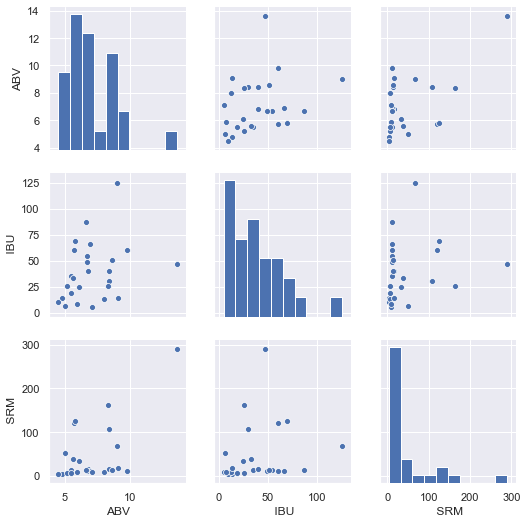

In [93]:
sns.pairplot(df)

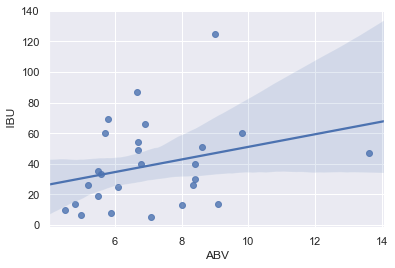

In [94]:
sns.regplot(x = "ABV", y = " IBU", data = df)

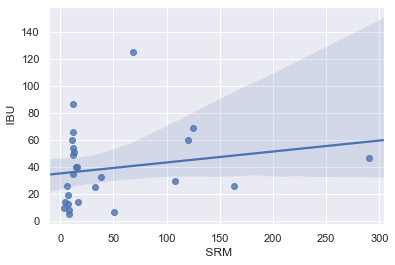

In [96]:
sns.regplot(x = " SRM", y = " IBU", data = df)